In [5]:
import pandas as pd
import numpy as np

import quandl

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
from scipy import stats

In [4]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [16]:
import yfinance as yf

start = pd.to_datetime("2010-01-04")
end = pd.to_datetime("2017-07-25")

spy_df = yf.download('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [13]:
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,88.117905,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,88.351158,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,88.413353,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,88.786598,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,89.082054,126402800


In [15]:
aapl_df = yf.download('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [17]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


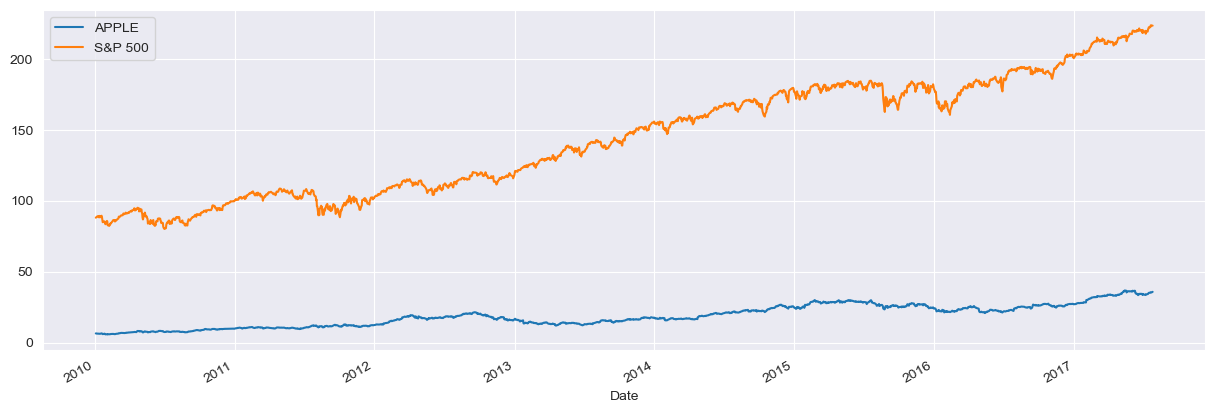

In [26]:
aapl_df["Adj Close"].plot(label="APPLE", figsize=(15, 5))
spy_df["Adj Close"].plot(label="S&P 500");
plt.legend();

In [24]:
aapl_df["cumulative"] = aapl_df["Close"] / aapl_df["Close"].iloc[0]
spy_df["cumulative"] = spy_df["Close"] / spy_df["Close"].iloc[0]

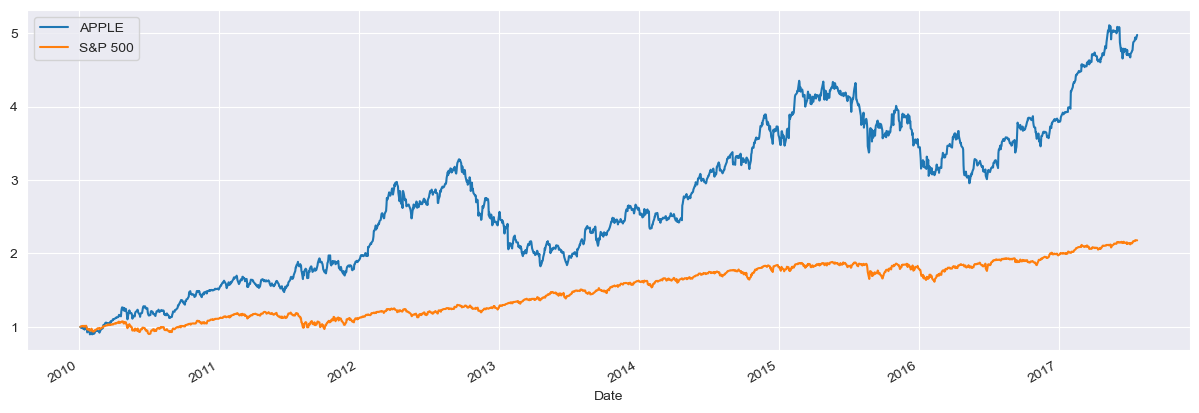

In [25]:
aapl_df["cumulative"].plot(label="APPLE", figsize=(15, 5))
spy_df["cumulative"].plot(label="S&P 500");
plt.legend();

In [28]:
aapl_df["daily_return"] = aapl_df["Close"].pct_change()
spy_df["daily_return"] = spy_df["Close"].pct_change()

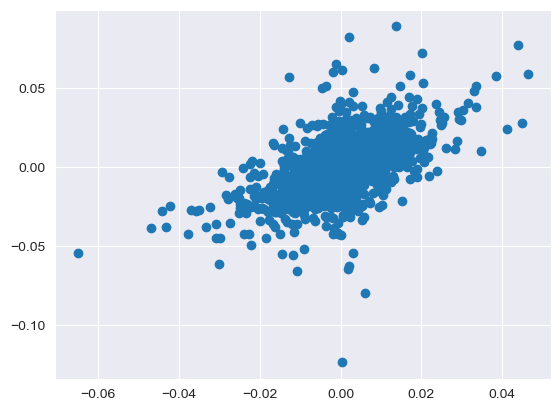

In [31]:
plt.scatter(
    x=spy_df["daily_return"],
    y=aapl_df["daily_return"], 
);

In [32]:
beta, alpha, r_value, p_value, std_err = stats.linregress(
    aapl_df["daily_return"].iloc[1:], 
    spy_df["daily_return"].iloc[1:]
)

In [34]:
print(beta)

0.3256387491016906


In [35]:
print(alpha)

0.00013697158935440702


In [36]:
print(r_value)

0.5555814950667348


In [38]:
noise = np.random.normal(loc=0.0, scale=0.001, size=len(spy_df))
fake_stock = spy_df.daily_return + noise

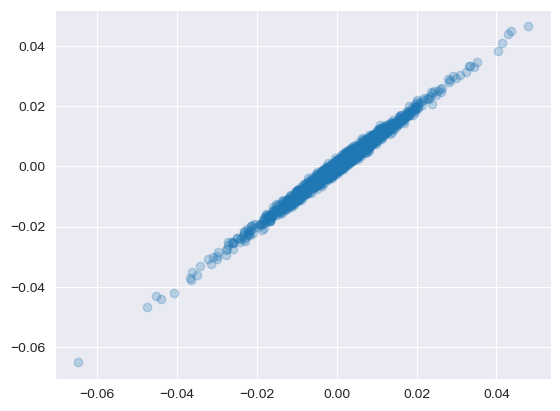

In [40]:
plt.scatter(
    x=fake_stock, 
    y=spy_df["daily_return"],
    alpha=0.25
);

In [42]:
beta, alpha, r_value, p_value, std_err = stats.linregress(
    fake_stock.iloc[1:], 
    spy_df["daily_return"].iloc[1:]
)

In [43]:
print(beta)

0.9867966290759589


In [44]:
print(alpha)

4.609344639534634e-05


In [45]:
print(alpha)

4.609344639534634e-05


In [46]:
print(p_value)

0.0


In [47]:
print(std_err)

0.002469228640243251
